In [161]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv('C:/Users/HP/Desktop/100 Days Machine learning/Csv.files/train_Iris.csv')

In [23]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,59,6.6,2.9,4.6,1.3,Iris-versicolor
1,98,6.2,2.9,4.3,1.3,Iris-versicolor
2,130,7.2,3.0,5.8,1.6,Iris-virginica
3,115,5.8,2.8,5.1,2.4,Iris-virginica
4,147,6.3,2.5,5.0,1.9,Iris-virginica


In [25]:
# df =df.drop(columns='Id')
df = df.iloc[:,1:]

In [27]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.6,2.9,4.6,1.3,Iris-versicolor
1,6.2,2.9,4.3,1.3,Iris-versicolor
2,7.2,3.0,5.8,1.6,Iris-virginica
3,5.8,2.8,5.1,2.4,Iris-virginica
4,6.3,2.5,5.0,1.9,Iris-virginica


In [29]:
from sklearn.preprocessing import LabelEncoder

In [31]:
encoder = LabelEncoder()

In [33]:
df['Species'] = encoder.fit_transform(df['Species'])

In [45]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
28,5.4,3.4,1.7,0.2,0
57,5.4,3.0,4.5,1.5,1
90,6.7,3.1,4.7,1.5,1
30,4.7,3.2,1.6,0.2,0
56,5.1,3.8,1.9,0.4,0


In [49]:
df = df[df['Species'] !=0][['SepalWidthCm','PetalLengthCm','Species']]

In [51]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
0,2.9,4.6,1
1,2.9,4.3,1
2,3.0,5.8,2
3,2.8,5.1,2
4,2.5,5.0,2


In [55]:
df.shape

(80, 3)

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

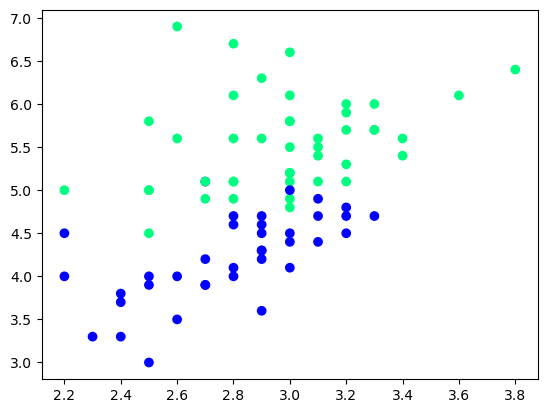

In [65]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [67]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
53,2.9,4.2,1
19,3.3,5.7,2
47,2.6,3.5,1
48,2.5,5.8,2
79,2.3,3.3,1
21,3.6,6.1,2
66,2.8,4.0,1
49,2.8,4.1,1
7,3.2,5.7,2
23,2.9,4.5,1


In [93]:
# Taking only 10 rows for training
df = df.sample(80)
df_train = df.iloc[:40,:].sample(10)
df_val = df.iloc[40:60,:].sample(5)
df_test = df.iloc[60:,:].sample(5)


In [95]:
df_train

,SepalWidthCm,PetalLengthCm,Species
113,3.0,5.2,2
41,3.2,5.9,2
21,3.6,6.1,2
59,2.9,5.6,2
64,3.0,5.8,2
51,2.8,5.6,2
91,2.6,4.0,1
94,3.0,4.8,2
29,3.1,5.5,2
0,2.9,4.6,1


In [97]:
df_val

,SepalWidthCm,PetalLengthCm,Species
9,3.1,5.1,2
19,3.3,5.7,2
83,2.4,3.3,1
20,2.2,4.5,1
68,3.2,5.1,2


In [99]:
df_test

,SepalWidthCm,PetalLengthCm,Species
69,3.0,5.2,2
67,2.4,3.8,1
2,3.0,5.8,2
48,2.5,5.8,2
16,3.1,4.9,1


In [105]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values


In [103]:
X_test

array([[3.1, 5.1],
       [3.3, 5.7],
       [2.4, 3.3],
       [2.2, 4.5],
       [3.2, 5.1]])

In [107]:
y_test

array([2, 2, 1, 1, 2])

# Case 1 - Bagging

In [114]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
0,2.9,4.6,1
113,3.0,5.2,2
29,3.1,5.5,2
21,3.6,6.1,2
91,2.6,4.0,1
0,2.9,4.6,1
0,2.9,4.6,1
91,2.6,4.0,1


In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [128]:
dt_bag1 = DecisionTreeClassifier()


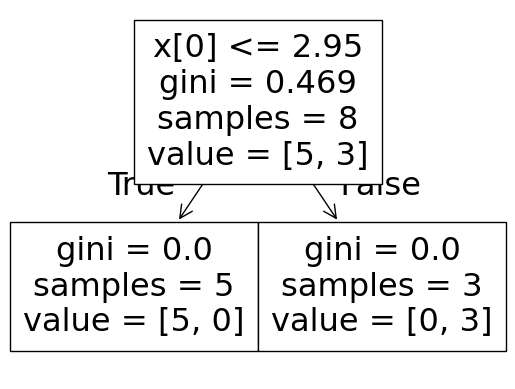

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


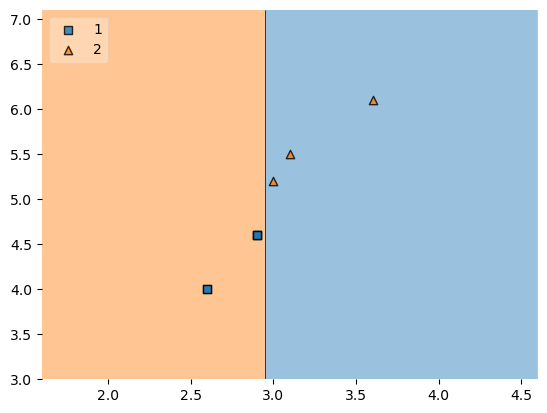

In [134]:
evaluate(dt_bag1,X,y)


In [140]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
64,3.0,5.8,2
113,3.0,5.2,2
64,3.0,5.8,2
94,3.0,4.8,2
59,2.9,5.6,2
91,2.6,4.0,1
94,3.0,4.8,2
51,2.8,5.6,2


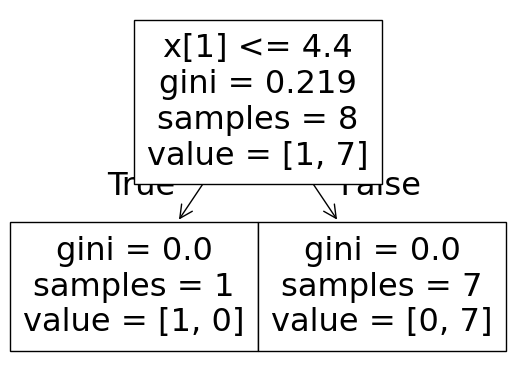

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


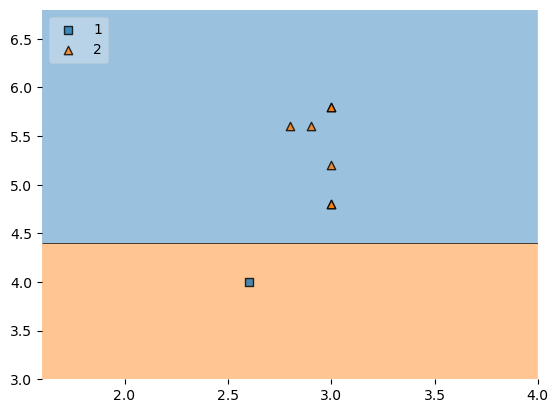

In [142]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [150]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
113,3.0,5.2,2
64,3.0,5.8,2
0,2.9,4.6,1
41,3.2,5.9,2
21,3.6,6.1,2
91,2.6,4.0,1
29,3.1,5.5,2
91,2.6,4.0,1


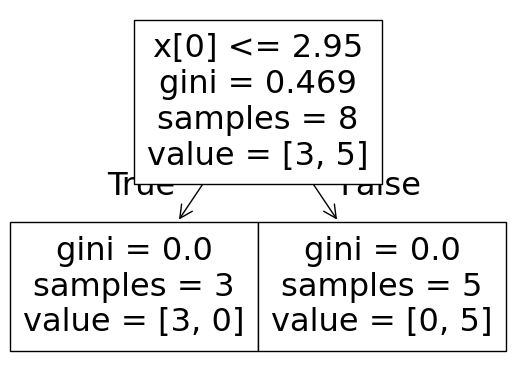

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


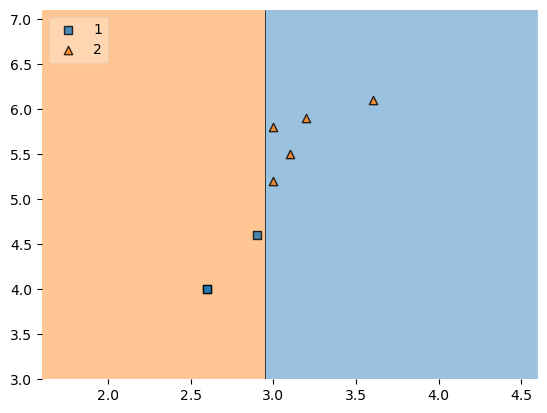

In [152]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [154]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

# Predict

In [157]:
df_test

,SepalWidthCm,PetalLengthCm,Species
69,3.0,5.2,2
67,2.4,3.8,1
2,3.0,5.8,2
48,2.5,5.8,2
16,3.1,4.9,1


In [171]:
print("Predictor 1",dt_bag1.predict(np.array([3.0,5.2]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [1]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [166]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
113,3.0,5.2,2
41,3.2,5.9,2
21,3.6,6.1,2
59,2.9,5.6,2
64,3.0,5.8,2
51,2.8,5.6,2
91,2.6,4.0,1
94,3.0,4.8,2
29,3.1,5.5,2
0,2.9,4.6,1


In [168]:
df_train.sample(8)


,SepalWidthCm,PetalLengthCm,Species
113,3.0,5.2,2
94,3.0,4.8,2
59,2.9,5.6,2
29,3.1,5.5,2
64,3.0,5.8,2
21,3.6,6.1,2
41,3.2,5.9,2
91,2.6,4.0,1


# Random Subspaces

In [179]:
# column sampling
df1 = pd.read_csv('C:/Users/HP/Desktop/100 Days Machine learning/Csv.files/train_Iris.csv')
df1 = df1.sample(10)

In [181]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
43,117,6.5,3.0,5.5,1.8,Iris-virginica
41,144,6.8,3.2,5.9,2.3,Iris-virginica
3,115,5.8,2.8,5.1,2.4,Iris-virginica
103,108,7.3,2.9,6.3,1.8,Iris-virginica
40,43,4.4,3.2,1.3,0.2,Iris-setosa
55,6,5.4,3.9,1.7,0.4,Iris-setosa
28,21,5.4,3.4,1.7,0.2,Iris-setosa
9,142,6.9,3.1,5.1,2.3,Iris-virginica
71,135,6.1,2.6,5.6,1.4,Iris-virginica
47,80,5.7,2.6,3.5,1.0,Iris-versicolor


In [204]:
# column sampling
df1.sample(2, replace=True,axis=1)

,SepalLengthCm,PetalLengthCm
43,6.5,5.5
41,6.8,5.9
3,5.8,5.1
103,7.3,6.3
40,4.4,1.3
55,5.4,1.7
28,5.4,1.7
9,6.9,5.1
71,6.1,5.6
47,5.7,3.5


# Random Patches

In [207]:
# In random patches we can do row sampling as well as column sampling
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
43,117,6.5,3.0,5.5,1.8,Iris-virginica
41,144,6.8,3.2,5.9,2.3,Iris-virginica
3,115,5.8,2.8,5.1,2.4,Iris-virginica
103,108,7.3,2.9,6.3,1.8,Iris-virginica
40,43,4.4,3.2,1.3,0.2,Iris-setosa
55,6,5.4,3.9,1.7,0.4,Iris-setosa
28,21,5.4,3.4,1.7,0.2,Iris-setosa
9,142,6.9,3.1,5.1,2.3,Iris-virginica
71,135,6.1,2.6,5.6,1.4,Iris-virginica
47,80,5.7,2.6,3.5,1.0,Iris-versicolor


In [214]:
# In random patches we can do row sampling as well as column sampling
# the idea is to create varaity in the data
df1.sample(8,replace=True).sample(2,replace=True,axis=1)


,Species,SepalWidthCm
40,Iris-setosa,3.2
28,Iris-setosa,3.4
40,Iris-setosa,3.2
55,Iris-setosa,3.9
40,Iris-setosa,3.2
9,Iris-virginica,3.1
43,Iris-virginica,3.0
55,Iris-setosa,3.9
